In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
device

device(type='cuda', index=0)

In [3]:
#To Transform Images to tensor and normalize
transform = transforms.Compose(
                            [transforms.ToTensor(),
                            transforms.Normalize((0.5,), (0.5,))])
# Lets load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

### Lets create a very simple Model with pool layer

In [4]:
class MaxPoolModel(nn.Module):
    def __init__(self):
        super(MaxPoolModel, self).__init__()
        self.pool1 = nn.MaxPool2d(2, 2) # 28x28 -> 14x14
        self.pool2 = nn.MaxPool2d(2, 2) # 14x14 -> 7x7
        self.fc = nn.Linear(7*7, 10)  # 49 to 10 (for 10 classes)
        # we need a fc layer in the end as we need to learn and adjust some parameters atleast
    def forward(self, x):
        x = self.pool1(x)
        x = self.pool2(x)
        x = x.view(-1, 7*7)
        x = self.fc(x)
        return x

In [5]:
model = MaxPoolModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 1.120
[1,  4000] loss: 0.713
[1,  6000] loss: 0.650
[1,  8000] loss: 0.623
[1, 10000] loss: 0.619
[1, 12000] loss: 0.576
[1, 14000] loss: 0.584
[2,  2000] loss: 0.571
[2,  4000] loss: 0.567
[2,  6000] loss: 0.535
[2,  8000] loss: 0.562
[2, 10000] loss: 0.552
[2, 12000] loss: 0.565
[2, 14000] loss: 0.537
[3,  2000] loss: 0.541
[3,  4000] loss: 0.533
[3,  6000] loss: 0.550
[3,  8000] loss: 0.538
[3, 10000] loss: 0.533
[3, 12000] loss: 0.552
[3, 14000] loss: 0.530
[4,  2000] loss: 0.550
[4,  4000] loss: 0.512
[4,  6000] loss: 0.537
[4,  8000] loss: 0.534
[4, 10000] loss: 0.547
[4, 12000] loss: 0.540
[4, 14000] loss: 0.515
[5,  2000] loss: 0.541
[5,  4000] loss: 0.518
[5,  6000] loss: 0.528
[5,  8000] loss: 0.523
[5, 10000] loss: 0.536
[5, 12000] loss: 0.527
[5, 14000] loss: 0.548
Finished Training


In [6]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 83 %


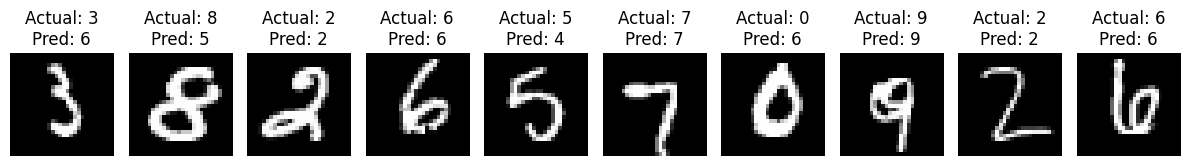

In [11]:
def imshow_grid(images, labels, predictions):
    """Display a grid of images with their labels and predictions."""
    n_images = images.shape[0]
    fig, axes = plt.subplots(1, n_images, figsize=(12, 3))
    for idx, ax in enumerate(axes):
        # Display the image
        img = images[idx] / 2 + 0.5  # Unnormalize
        ax.imshow(img.squeeze().numpy(), cmap='gray') 
        
        ax.set_title(f"Actual: {labels[idx].item()}\nPred: {predictions[idx].item()}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

batch_size_display = 10
testloader_new = torch.utils.data.DataLoader(testset, batch_size=batch_size_display,shuffle=True, num_workers=2)

images, labels = next(iter(testloader_new))

# Predict using the model
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

imshow_grid(images, labels, predicted)
